<a href="https://colab.research.google.com/github/shannonlal/Statistical-YCBS-255/blob/main/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment 3  <font color="blue"> (15 points) </font>
 
***

### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

In [19]:
# Imports for workbook
# Load Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_validate, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from math import sqrt
from sklearn.metrics import r2_score, get_scorer, make_scorer, mean_squared_error
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from google.colab import files
from sklearn.preprocessing import OneHotEncoder

## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively. 
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters. 
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

In [ ]:
# Part A Generate 100 points equally distanced from  −20  to  20  and save them in a numpy array x1. 
#Now, create  4  more numpy arrays by raising x1 to the power of  2,3,4,5 , and call them x2, x3, x4 and x5, 
# respectively.
x1 = np.linspace( -20, 20, 100 )
x1 = np.array( x1 ).reshape( -1,1)

# https://numpy.org/doc/stable/reference/generated/numpy.power.html
x2 = np.power ( x1, 2)
x3 = np.power ( x1, 3)
x4 = np.power ( x1, 4)
x5 = np.power ( x1, 5)



In [ ]:
# Part A, Q2: Create your response y, a new numpy array, defined as 𝑦=1.75+5𝑥1+0.05𝑥3−10.3𝑥5+𝜀, where  𝜀∼(0,4)
# This function follows the generic formula:
# y = B0 + B1x1 + B2x3 + B3x5 + 𝜀

## Define known constants
B0 = 1.75
B1 = 5
B2 = 0.05
B3 = 10.3

## Calculate 𝜀 with a normal distribution with mean of 0 and standard deviation of 4
## We will use the formula from numpy to get a normal distribution
## np.random.normal (p)
## We need 3 variables: mean, standard deviation spread, size
## Size: is 100
## mean = 0
## standard deviation: sqrt(4)
size = 100
mu = 0
std_dev = sqrt(4)
np.random.seed(1)     # Fixing a seed
e = np.random.normal(mu, std_dev, size)

y = B0 + B1*x1 + B2*x3 + B3*x5 + e

print( y )


[[-32960495.00130928 -32960499.47351283 -32960499.30634351 ...
  -32960498.16280629 -32960499.49000169 -32960496.85393593]
 [-29763003.00773814 -29763007.4799417  -29763007.31277237 ...
  -29763006.16923515 -29763007.49643056 -29763004.8603648 ]
 [-26818621.63635956 -26818626.10856311 -26818625.94139379 ...
  -26818624.79785657 -26818626.12505198 -26818623.48898622]
 ...
 [ 26818631.63374101  26818627.16153746  26818627.32870678 ...
   26818628.472244    26818627.1450486   26818629.78111435]
 [ 29763013.00511962  29763008.53291606  29763008.70008539 ...
   29763009.8436226   29763008.5164272   29763011.15249296]
 [ 32960504.99869073  32960500.52648718  32960500.6936565  ...
   32960501.83719372  32960500.50999831  32960503.14606407]]


In [ ]:
# QA - Part 3 Using  5 -fold cross-validation, with a reasonable train-test proportion, train a lasso regression model 
# including all  𝑥1,𝑥2,𝑥3,𝑥4,𝑥5 , and for  10  different pre-determined tuning parameters.

## Process
## Note: Follow workbook 4 but replaced with Lasso instead of Logistic Regression
## 1. We need to merge the different arrays into a main array
## 2. Need to define 10 different pre-determined tuning parameters
## 3. We need to split the detail using k fold and calculate accuracy

## Process for splitting and calculating accuracy 
## 1. Using K-Fold split the data into train and test 5 times
## 2. For test and train, 

# Configure variables


#C Configure data
combined_data = np.concatenate((y,x1,x2,x3,x4,x5), axis = 1)
X = combined_data[:, 1:6]
y = combined_data[:,0]

## Build a set of 10 tuning parameters between 0.0001 and 0.004
tuning_parameters = np.linspace(0.00001,0.004,10) 

## Configure K-Fold Split
k = 5
k_fold = KFold(n_splits = k)

## Model scoring
scoring = 'neg_mean_squared_error'
scorer = get_scorer(scoring)

## Variables to hold data
validation_scores = []
train_scores = []
results_list = []
test_scores = []

for train_index, test_index in k_fold.split(combined_data):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  for t_param in tuning_parameters:
    model = Lasso( alpha = t_param)

    rst_cross_validation = cross_validate(model, X, y, scoring='neg_mean_squared_error', cv=k_fold, return_train_score = True)

    validation_scores.append(np.mean(rst_cross_validation['test_score']))
    train_scores.append(np.mean(rst_cross_validation['train_score']))
    results_list.append(rst_cross_validation)

    model.fit(X,y)
    y_pred = model.predict(X_test)
    test_scores.append(scorer(model, X_test, y_test))

    alpha_id = np.argmax(validation_scores)
    alpha = tuning_parameters[alpha_id]
    max_validation_score = np.max(validation_scores)
    test_score_at_chosen_alpha = test_scores[alpha_id]
    print('chosen_alpha:', alpha) 
    print('max_validation_score:', max_validation_score)
    print('test_score_at_chosen_alpha:', test_score_at_chosen_alpha)


In [ ]:
# QA - Part 3 Plot the cross-validated mean squared errors vs the tuning parameter's values and chose the best tuning parameter based on the plot. 
# Does the best model chosen perform variable selection?

plt.figure(figsize = (8,8))
sns.lineplot(y = validation_scores, x = tuning_parameters, label = 'validation_data')
sns.lineplot(y = train_scores, x = tuning_parameters, label = 'training_data')
plt.axvline(x=alpha, linestyle='--')
sns.lineplot(y = test_scores, x = tuning_parameters, label = 'test_data')
plt.xlabel('alpha_parameter')
plt.ylabel(scoring)
plt.title('LASSO Regularisation')
plt.legend()
plt.show()

<Figure size 576x576 with 0 Axes>

ValueError: ignored

<Figure size 576x576 with 0 Axes>

In [ ]:
## Junk Notes



# Look at assignment #4

# #2 Part B, Q7
lasso_regression = Lasso(alpha=0.5)

# Don't use Y
data = np.concatenate((y,x1,x2,x3,x4,x5), axis = 1)

# Question 3


from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso

k = 5
kf = KFold(n_splits = k)
# kf.get_n_splits(X)
X = data[:,1:6]
y = data[:,0]

# # For each decision_threshold the following must be done
threshold_mean_accuracy =  np.zeros(len(decision_threshold)) # mean accuracy of each threshold
for i in range(len(decision_threshold)):
    threshold = decision_threshold[i]
    print('Threshold: ', threshold)
    mae_lasso0 = 0

    for train_index, test_index in kf.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        lasso_regression = Lasso(alpha=0.5)
        lasso_regression.fit(X_train,y_train)
        print('R^2:',lasso_regression.score(X_train,y_train))
        y_pred_lasso = lasso_regression.predict(X_test)
        mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
        print(f'mae_lasso: {mae_lasso}')
        
        #predicts = np.where(lasso_regression.predict_proba(X_test)[:,1] > threshold, 1, 0)
        mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
        mae_lasso0 = mae_lasso0 + mae_lasso

        for train_index, test_index in kf.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


# Workbook 4


## **Part B** <font color="blue">(3 points)</font>
For this part upload `Wage.csv`.

1. **<font color="blue">(2 points)</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data. 
2. **<font color="blue">(1 point)</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.


In [3]:
# Part B - Load Wage data
uploaded = files.upload()

# Look at workbook 6 for polynimal Regression

Saving Wage.csv to Wage.csv


In [4]:
## Analyze the data and treat
wage_data = pd.read_csv('Wage.csv')
wage_data.drop(columns=['Unnamed: 0'], inplace=True)
wage_data.head()

# Print the shape
print( wage_data.shape)

# Describe the data
print( wage_data.describe() )


,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


(3000, 12)
              year          age      logwage         wage
count  3000.000000  3000.000000  3000.000000  3000.000000
mean   2005.791000    42.414667     4.653905   111.703608
std       2.026167    11.542406     0.351753    41.728595
min    2003.000000    18.000000     3.000000    20.085537
25%    2004.000000    33.750000     4.447158    85.383940
50%    2006.000000    42.000000     4.653213   104.921507
75%    2008.000000    51.000000     4.857332   128.680488
max    2009.000000    80.000000     5.763128   318.342430


In [9]:
# Part B. Q 1: Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree  𝑑  for the polynomial. 
# What degree was chosen? Make a plot of the resulting polynomial fit to the data.

data_x = wage_data['age']   # indep. var.
data_y = wage_data['wage']  # depend. var.

# Split the data using 33% split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

x_train = np.array(train_x).reshape(-1,1) 

## Define local variables to keep the data in sync
validation_scores = []
train_scores = []
results_list = []
test_scores = []
## Build a a range of polynomials with different degrees and evaluate the validation scores
degrees = [2,3,4,5,6,7,8,9,10]

## Define the K-Fold split fold split for the data
k = 5


## Function for calculating a single polynomial and its validation score

def determine_validation_score( x_train, y_train, d, k, validation_scores, train_scores ): 
  # Solution from Workbook on building polynomials 
  poly= PolynomialFeatures(degree=i)
  X_poly = poly.fit_transform(x_train)
  poly.fit(X_poly, y_train)
  model = LinearRegression()
  k_fold = KFold(n_splits = k)

  rst_cross_validation = cross_validate(model, X_poly, train_y, cv=k_fold, return_train_score = True)

  validation_scores.append(np.mean(rst_cross_validation['test_score']))
  train_scores.append(np.mean(rst_cross_validation['train_score']))

# Solution:
for i in degrees:
  # Calculate for the validation score for each degree
  determine_validation_score(x_train, train_y, i, k, validation_scores, train_scores )
      

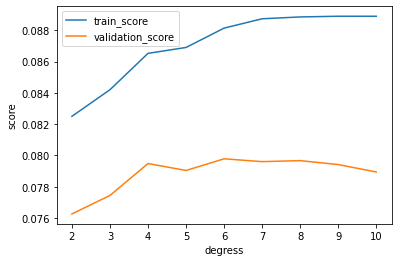

In [10]:
## Build a plot of the degrees vs valiation score to determine the appropriate value
plt.plot(degrees, train_scores , label = 'train_score')
plt.plot(degrees, validation_scores , label = 'validation_score')
plt.legend()
plt.xlabel('degress')
plt.ylabel('score');

**Part B Question 1 Summary**

From the above plot we can see that the gap between train and test scors start increasing after 4; therefore, the optimial degree for the polynomial is degree = 4

In [12]:
# Part B. Q 2: Fit a step function to predict wage using age , and perform cross-validation to choose the optimal number of cuts. 
# Make a plot of the fit obtained.

# Solution.  
## To find the optimal number of cuts, we are going to need to create mutliple step functions that predict the wage using age. 
## I will follow a similar process as above and create a function to predict the age and calculate the RSME for each cut
## Once I have tried this I will plot a graph of RMSE for each cut
## NOTE: Referenced step function solution in Workbook 6
def determine_rmse_by_cut (x_train, y_test, test_x, n, test_scores):
  df_cut, bins = pd.cut(train_x, n, retbins=True, right=True)
  df_steps = pd.concat([train_x, df_cut, train_y], keys=['age','age_cuts','wage'], axis=1)
  df_steps_dummies = pd.get_dummies(df_cut)
    
  # Fit the data
  fit = sm.GLM(df_steps.wage, df_steps_dummies).fit()

  # Binning validation set into same n bins
  bin_mapping = np.digitize(test_x, bins) 
  X_valid = pd.get_dummies(bin_mapping)

  # Removing any outliers
  X_valid = pd.get_dummies(bin_mapping).drop([n], axis=1)# Prediction

  # Predict the data and calculate RMSE
  pred = fit.predict(X_valid)
  rms = sqrt(mean_squared_error(test_y, pred)) 
  test_scores.append(rms) 

# Local variables
test_scores = []
# Start with 2-10 cuts
num_cuts = [2,3,4,5,6,7,8,9,10]

for n in num_cuts:
  determine_rmse_by_cut(x_train, test_y, test_x, n, test_scores)





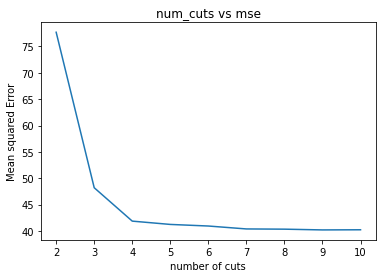

In [13]:
## Build a plot of the number of cuts vs Mean Squared Error to determine the appropriate number of cuts

plt.xlabel('number of cuts')
plt.ylabel('Mean squared Error')
plt.title('num_cuts vs mse')
plt.plot(num_cuts , test_scores);

**Part B Question 2 Summary**

From the above plot we can see that the break point is at cuts = 4, hence we choose the optimal cuts as 4


## **Part C** <font color="blue">(4 points)</font>
Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


In [14]:
# Part C - Load Wine Data
uploaded = files.upload()


Saving wine_255.csv to wine_255.csv


In [17]:
## Load the wine data and drop unnamed column
wine_data = pd.read_csv("wine_255.csv")
wine_data.drop(['Unnamed: 0'], axis=1, inplace=True)

wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


In [20]:
## From workbook 9 execerise, use one hot encoding to replace type with 0 or 1
enc = OneHotEncoder(handle_unknown='ignore')
endode_data = [['red', 1], ['white', 0]]


wine_data['red_wine'] = pd.get_dummies(wine_data['type'])['red']

## **Part D** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters. 
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data. 
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  
